# Exploratory Data Analysis

1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터 개별 속성 파악하기

## 0. 라이브러리 준비

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [138]:
## 동일 경로에 "train.csv"가 있다면:
## 데이터 불러오기

titanic_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인

- 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [139]:
## 상위 5개 데이터 확인하기

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
## 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [141]:
## 데이터 전체 정보를 얻는함수 : .describe()

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [142]:
## 상관계수 확인

titanic_df.corr()

# Correlation is NOT Causation

# 상관성 : A up, B up
# 인과성 : A -> B

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [143]:
## 결측치 확인

titanic_df.isnull().sum()
# Age, Cabin, Embarked에서 결측치 발견

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### 1. Suvived Column

In [144]:
## 생존자, 사망자 명수는?

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

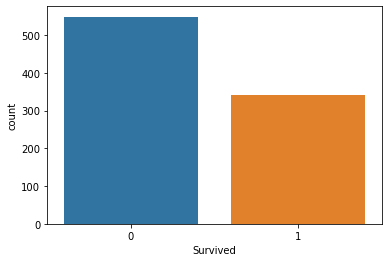

In [145]:
## 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x='Survived', data= titanic_df)
plt.show()

In [146]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [147]:
# 생존자 인원?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [148]:
# 생존 비율?


titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

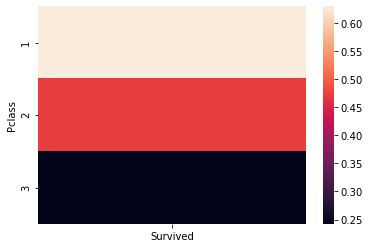

In [149]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

## 3. Sex

In [150]:
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

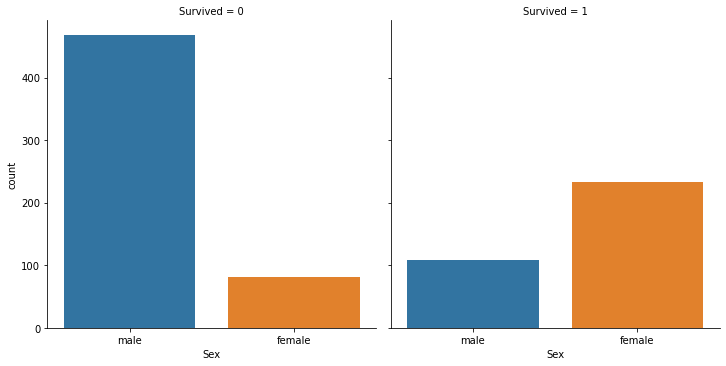

In [151]:
# sns.catplot

sns.catplot(x='Sex',col='Survived',kind = 'count',data = titanic_df)

## 4. Age
! 결측치 존재 !

In [152]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

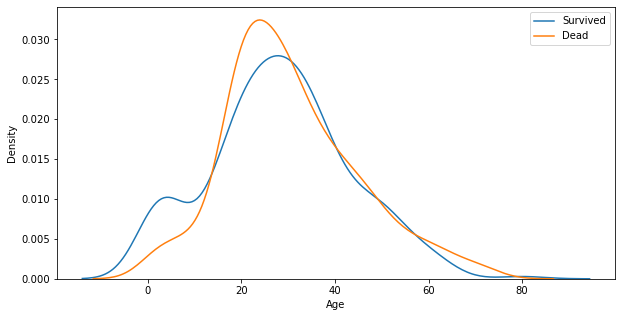

In [153]:
## Survived 1, 0 과 Age의 경향성

# subplots -> 여러 개의 plot을 한 번에 보여주는 함수

# figure -> axis -> plot
# figure : 그래프에 대한 도면
# axis : figure 안에 있는 각각의 틀. 이 위에 plot이 그려진다.

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survived','Dead'])

plt.show()

## Appendix 1. Sex + Pclass vs Survived

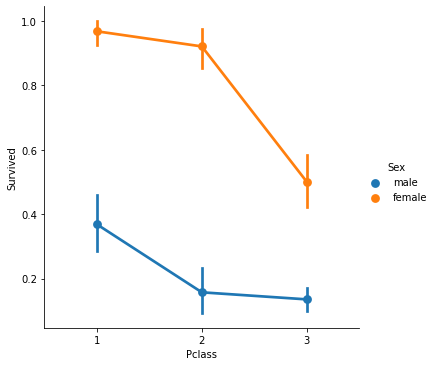

In [154]:
sns.catplot(x="Pclass", y="Survived", hue = "Sex", kind="point", data = titanic_df)
plt.show()

## Appendix 2. Age + Pclass

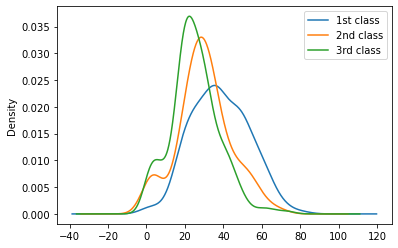

In [155]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class','2nd class','3rd class'])
plt.show()

# Mission : It's Your Turn!

## 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

* Hint : Fare? Sibsp? Parch?

In [156]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

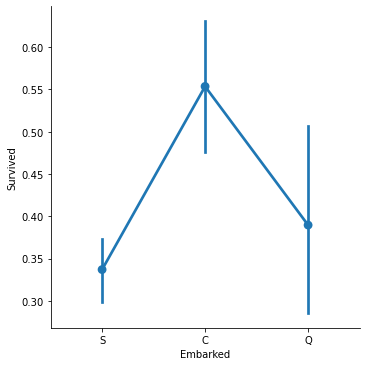

In [157]:
# 탑승 위치와 생존률은 상관관계가 있을 것이다. => C 선박장에서 탑승한 사람들은 생존율이 더 높은 것을 확인할 수 있었다.

sns.catplot(x='Embarked',y='Survived',kind = 'point',data = titanic_df)
plt.show()

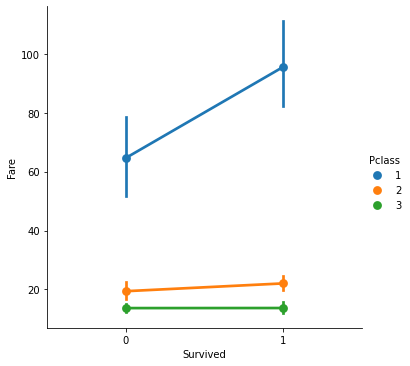

In [158]:
# Pclass가 높은 곳을 탑승한 사람이 더 많은 Fare를 지불했을 것이고, 그에 응당한 시설물들과 서비스가 갖춰져 있었을 것이므로 생존율이 높았을 것이다.
# => Pclass가 높은 곳을 탑승한 사람이 더 많은 Fare를 지불했다.
# => 1등석은 생존율이 사망율보다 압도적으로 높았고, 2등석은 생존율이 사망율보다 조금 더 높았으며, 3등석은 생존율과 사망율이 거의 비슷하다는 사실을 확인할 수 있었다.

sns.catplot(x="Survived", y="Fare", hue = "Pclass", kind="point", data = titanic_df)
plt.show()

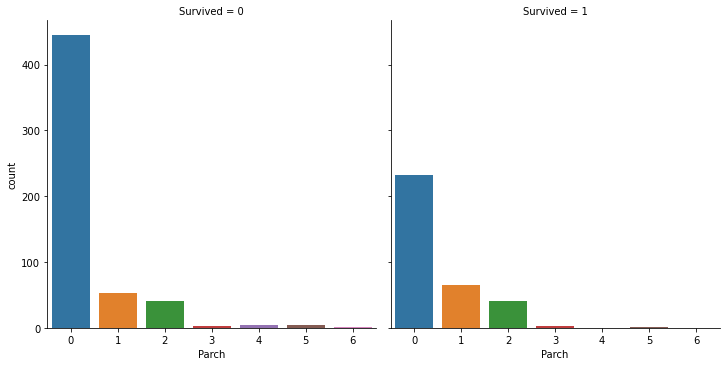

In [159]:
# 부모, 자식이 많으면 많을수록 챙겨야 하는 사람들이 많아져 미처 자신을 챙기지 못해 생존율이 낮을 것이다.
# => 챙겨야 할 사람들이 한 명도 없는 사람들의 수가 매우 많아 사망율이 굉장히 큰 것으로 나타나지만, 가장 높은 생존율 또한 기록하고 있다.

sns.catplot(x='Parch',col='Survived',kind = 'count',data = titanic_df)
plt.show()

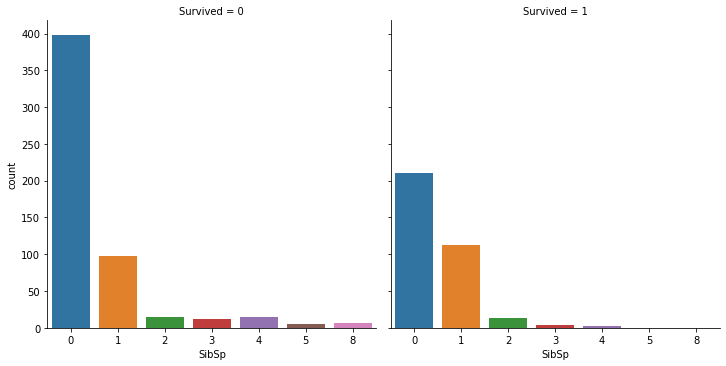

In [160]:
# 위와 일맥상통한 이유로 형제, 자매가 많으면 많을수록 생존율이 낮을 것이다.
# => 위와 비슷한 결과가 나타났다.

sns.catplot(x='SibSp',col='Survived',kind = 'count',data = titanic_df)
plt.show()